# Previous Notebook

In the previous notebook is was noticed that certain features had very steep partial dependence curves. It was suggested that by taking the log of these features, the machine may be able to learn those features better, therefore generating better predictions. 

This notebook will look at the formerly mentioned features, log transform them, and observe the effects on the score. 

To see the previous notebook see: 

https://github.com/NickBuchny/UTSCProjects/blob/master/Project%202/Extracting%20Physical%20Relationships%20from%20Gradient%20Boosting%20Models%20.ipynb

In [110]:
import pandas as pd
import numpy as np
from sklearn import cross_validation, metrics   
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
import operator 
import xgboost as xgb
from xgboost.sklearn import XGBClassifier 
display(HTML("<style>.container { width:100% !important; }</style>"))
%matplotlib inline
trainData = pd.read_csv('1e7data_train.csv', index_col=0)
testData = pd.read_csv('1e7data_holdout.csv', index_col=0)
df = trainData
dftest = testData

feature_names = ['daOverRH1', 'daOverRH2', 'mindaOverRH', 'maxdaOverRH','norm_std_a1',
                 'norm_max_a1', 'norm_std_window10_a1', 'norm_max_window10_a1',
                'norm_std_a2', 'norm_std_window10_a2', 'norm_max_window10_a2', 'norm_max_a2',
                'norm_std_a3', 'norm_max_a3', 'norm_std_window10_a3', 'norm_max_window10_a3', 
                'avg_ecross1', 'std_ecross1', 'min_ecross1', 'max_ecross1', 
                'avg_ecross2', 'std_ecross2', 'max_ecross2', 'min_ecross2',
                'avg_ecross3', 'max_ecross3', 'min_ecross3', 'std_ecross3', 
                'norm_a1_slope', 'norm_a2_slope', 'norm_a3_slope', 'norm_LyapunovTime']

X_train = df[feature_names]


y_train = df['Stable']
X_test = dftest[feature_names]

X_train = X_train.replace(np.nan, -999)
X_train = X_train.replace(np.inf, -999)

X_test = X_test.replace(np.nan, -999)
X_test = X_test.replace(np.inf, -999)

The scores from the original Gradient Boosting Classifier: 



In [2]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(loss='deviance', learning_rate=0.002, n_estimators=5000,
                                  subsample=.5,  min_samples_split=2, 
                                  min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=8,
                                  init=None, random_state=42, 
                                  max_leaf_nodes=8, warm_start=False, max_features=.5)



model.fit(X_train, y_train)

dtest_predictions = model.predict(X_test) 
dtest_predprob = model.predict_proba(X_test)[:, 1]

#Print model report:
print "\nModel Report"
print "Accuracy : %.4g" % metrics.accuracy_score(dftest['Stable'].values, dtest_predictions)
print "AUC Score (Test): %f" % metrics.average_precision_score(dftest['Stable'], dtest_predprob)
print 'ROC_AUC_Score: ', metrics.roc_auc_score(dftest['Stable'], dtest_predprob)


Model Report
Accuracy : 0.8873
AUC Score (Test): 0.895186
ROC_AUC_Score:  0.945591898717


A sample of the features which caused the behavior to arise are: 
    
norm_std_a2

norm_max_a2

norm_std_a3

As these values are small, we'll use the numpy function log1p. 


To test I'll try on norm_std_a2; 

The values before the transformation: 

In [50]:
X_train['norm_std_a2']

Sim_ID
2414    0.000205
4056    0.001574
4855    0.000194
517     0.000155
1520    0.001257
1642    0.000317
841     0.000700
1043    0.000497
681     0.000406
2377    0.001410
798     0.001055
2654    0.000522
3585    0.000333
2364    0.000807
3224    0.001205
1864    0.000470
1478    0.002073
2725    0.001079
275     0.001597
953     0.000351
3763    0.000510
575     0.000183
1067    0.000506
656     0.000308
1260    0.000291
1237    0.001583
3830    0.001039
4959    0.000502
2297    0.000620
15      0.000806
          ...   
51      0.000667
4684    0.000362
3350    0.000170
1384    0.000307
4505    0.000269
1074    0.000601
3532    0.000245
246     0.000254
4583    0.000389
3150    0.000332
1569    0.000739
4547    0.001515
309     0.004604
2578    0.000397
451     0.000322
1004    0.000418
4923    0.000243
2515    0.001402
1409    0.000462
4485    0.000154
187     0.000586
270     0.001571
3982    0.015735
3133    0.000710
1124    0.000247
4465    0.000677
4231    0.000441
487    

In [69]:
df['log_norm_std_a2'] = np.log(df['norm_std_a2'])

df['log_norm_max_a2'] = np.log(df['norm_max_a2'])

df['log_norm_std_a3'] = np.log( df['norm_std_a3'])

dftest['log_norm_std_a2'] =  np.log(dftest['norm_std_a2'])
dftest['log_norm_max_a2'] = np.log(dftest['norm_max_a2'])
dftest['log_norm_std_a3'] = np.log(dftest['norm_std_a3'])

df['log_norm_std_a2']

Sim_ID
2414   -8.490562
4056   -6.453904
4855   -8.546263
517    -8.774385
1520   -6.679245
1642   -8.058103
841    -7.264445
1043   -7.607366
681    -7.809877
2377   -6.563953
798    -6.854677
2654   -7.557019
3585   -8.006730
2364   -7.121898
3224   -6.721251
1864   -7.662576
1478   -6.178672
2725   -6.831483
275    -6.439539
953    -7.955005
3763   -7.581704
575    -8.605391
1067   -7.588749
656    -8.085968
1260   -8.141297
1237   -6.448411
3830   -6.869381
4959   -7.597593
2297   -7.385386
15     -7.122835
          ...   
51     -7.312856
4684   -7.923877
3350   -8.679502
1384   -8.089251
4505   -8.219205
1074   -7.416412
3532   -8.313869
246    -8.279694
4583   -7.852140
3150   -8.009215
1569   -7.210332
4547   -6.492348
309    -5.380747
2578   -7.832042
451    -8.040309
1004   -7.780590
4923   -8.324204
2515   -6.569510
1409   -7.678940
4485   -8.780018
187    -7.442988
270    -6.455950
3982   -4.151861
3133   -7.249912
1124   -8.306450
4465   -7.298551
4231   -7.727413
487    

Replace the old features with the log.

In [74]:
feature_names = ['daOverRH1', 'daOverRH2', 'mindaOverRH', 'maxdaOverRH','norm_std_a1',
                 'norm_max_a1', 'norm_std_window10_a1', 'norm_max_window10_a1',
                'log_norm_std_a2', 'norm_std_window10_a2', 'norm_max_window10_a2', 'log_norm_max_a2',
                'log_norm_std_a3', 'norm_max_a3', 'norm_std_window10_a3', 'norm_max_window10_a3', 
                'avg_ecross1', 'std_ecross1', 'min_ecross1', 'max_ecross1', 
                'avg_ecross2', 'std_ecross2', 'max_ecross2', 'min_ecross2',
                'avg_ecross3', 'max_ecross3', 'min_ecross3', 'std_ecross3', 
                'norm_a1_slope', 'norm_a2_slope', 'norm_a3_slope', 'norm_LyapunovTime']

X_train = df[feature_names]


y_train = df['Stable']
X_test = dftest[feature_names]

X_train = X_train.replace(np.nan, -999)
X_train = X_train.replace(np.inf, -999)

X_test = X_test.replace(np.nan, -999)
X_test = X_test.replace(np.inf, -999)

In [75]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(loss='deviance', learning_rate=0.002, n_estimators=5000,
                                  subsample=.5,  min_samples_split=2, 
                                  min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=8,
                                  init=None, random_state=42, 
                                  max_leaf_nodes=8, warm_start=False, max_features=.5)



model.fit(X_train, y_train)

dtest_predictions = model.predict(X_test) 
dtest_predprob = model.predict_proba(X_test)[:, 1]

#Print model report:
print "\nModel Report"
print "Accuracy : %.4g" % metrics.accuracy_score(dftest['Stable'].values, dtest_predictions)
print "AUC Score (Test): %f" % metrics.average_precision_score(dftest['Stable'], dtest_predprob)
print 'ROC_AUC_Score: ', metrics.roc_auc_score(dftest['Stable'], dtest_predprob)


Model Report
Accuracy : 0.886
AUC Score (Test): 0.895661
ROC_AUC_Score:  0.945788117663


Instead we'll try log1p, which is the natural log, adding 1 to each value. 


In [102]:
df['log_norm_std_a2'] = np.log1p(df['norm_std_a2'])

df['log_norm_max_a2'] = np.log1p(df['norm_max_a2'])

df['log_norm_std_a3'] = np.log1p(df['norm_std_a3'])

dftest['log_norm_std_a2'] =  np.log1p(dftest['norm_std_a2'])
dftest['log_norm_max_a2'] = np.log1p(dftest['norm_max_a2'])
dftest['log_norm_std_a3'] = np.log1p(dftest['norm_std_a3'])

In [103]:
feature_names = ['daOverRH1', 'daOverRH2', 'mindaOverRH', 'maxdaOverRH','norm_std_a1',
                 'norm_max_a1', 'norm_std_window10_a1', 'norm_max_window10_a1',
                'log_norm_std_a2', 'norm_std_window10_a2', 'norm_max_window10_a2', 'log_norm_max_a2',
                'log_norm_std_a3', 'norm_max_a3', 'norm_std_window10_a3', 'norm_max_window10_a3', 
                'avg_ecross1', 'std_ecross1', 'min_ecross1', 'max_ecross1', 
                'avg_ecross2', 'std_ecross2', 'max_ecross2', 'min_ecross2',
                'avg_ecross3', 'max_ecross3', 'min_ecross3', 'std_ecross3', 
                'norm_a1_slope', 'norm_a2_slope', 'norm_a3_slope', 'norm_LyapunovTime']

X_train = df[feature_names]


y_train = df['Stable']
X_test = dftest[feature_names]

X_train = X_train.replace(np.nan, -999)
X_train = X_train.replace(np.inf, -999)

X_test = X_test.replace(np.nan, -999)
X_test = X_test.replace(np.inf, -999)

In [104]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(loss='deviance', learning_rate=0.002, n_estimators=5000,
                                  subsample=.5,  min_samples_split=2, 
                                  min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=8,
                                  init=None, random_state=42, 
                                  max_leaf_nodes=8, warm_start=False, max_features=.5)



model.fit(X_train, y_train)

dtest_predictions = model.predict(X_test) 
dtest_predprob = model.predict_proba(X_test)[:, 1]

#Print model report:
print "\nModel Report"
print "Accuracy : %.4g" % metrics.accuracy_score(dftest['Stable'].values, dtest_predictions)
print "AUC Score (Test): %f" % metrics.average_precision_score(dftest['Stable'], dtest_predprob)
print 'ROC_AUC_Score: ', metrics.roc_auc_score(dftest['Stable'], dtest_predprob)


Model Report
Accuracy : 0.886
AUC Score (Test): 0.895390
ROC_AUC_Score:  0.945741195741


As we can see, it had no significant effect on the score, (even decreasing model accuracy in the 100th place). We'll see if it had any effect on the PDPs. 

In [105]:
vals = model.feature_importances_*100000

val_dict = dict(zip(feature_names, vals))
sorted_vals = sorted(val_dict.items(), key = operator.itemgetter(1), reverse=True)

feature_names_sorted = []
for scores in sorted_vals: 
    feature_names_sorted.append(scores[0])

vals_sorted = sorted(vals, reverse=True)

X_train_sorted = X_train.reindex_axis(feature_names_sorted, axis=1)

model.fit(X_train_sorted, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.002, loss='deviance', max_depth=8,
              max_features=0.5, max_leaf_nodes=8, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=5000,
              presort='auto', random_state=42, subsample=0.5, verbose=0,
              warm_start=False)

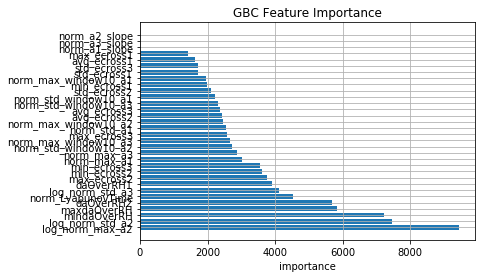

['log_norm_max_a2', 'log_norm_std_a2', 'mindaOverRH', 'maxdaOverRH', 'daOverRH2', 'norm_LyapunovTime', 'log_norm_std_a3', 'daOverRH1', 'max_ecross2', 'min_ecross2', 'min_ecross3', 'norm_max_a1', 'norm_max_a3', 'norm_std_window10_a2', 'norm_max_window10_a3', 'max_ecross3', 'norm_std_a1', 'norm_max_window10_a2', 'avg_ecross2', 'avg_ecross3', 'norm_std_window10_a3', 'norm_std_window10_a1', 'std_ecross2', 'min_ecross1', 'norm_max_window10_a1', 'std_ecross1', 'std_ecross3', 'avg_ecross1', 'max_ecross1', 'norm_a1_slope', 'norm_a3_slope', 'norm_a2_slope']


In [106]:
from pylab import *

points = vals_sorted

pos = arange(len(vals_sorted)) + .5 # centres the graph along y 

figure(1) 
barh(pos, vals_sorted, align='center') 
yticks(pos, feature_names_sorted)
xlabel('importance')
title('GBC Feature Importance')
grid(True)
show()

print(feature_names_sorted)

<IPython.core.display.Javascript object>


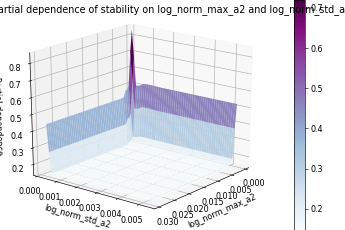

In [107]:
%matplotlib nbagg    
%matplotlib notebook

from sklearn.ensemble.partial_dependence import partial_dependence
from mpl_toolkits.mplot3d import Axes3D

def D3_pdp(target_feature, model, X_train, names_list):
    fig = plt.figure()
    pdp, axes = partial_dependence(model, target_variables=target_feature, X=X_train_sorted, 
                                   grid_resolution=50, proba=True)
    XX, YY = np.meshgrid(axes[0], axes[1])
    Z = pdp[0].reshape(list(map(np.size, axes))).T

    ax = Axes3D(fig)
    
    surf = ax.plot_surface(XX, YY, Z, rstride=1, cstride=1, cmap=plt.cm.BuPu)
    ax.set_xlabel(feature_names_sorted[target_feature[0]])
    ax.set_ylabel(feature_names_sorted[target_feature[1]])
    ax.set_zlabel('Partial dependence')
    #  pretty init view
    ax.view_init(elev=22, azim=122)
    plt.colorbar(surf)
    plt.suptitle('Partial dependence of stability on {0} and {1} '.format(names_list[target_feature[0]], names_list[target_feature[1]]))
    plt.subplots_adjust(top=0.9)

    plt.show()
    
names = feature_names_sorted

D3_pdp((0,1), model, X_train_sorted, feature_names_sorted)

In [111]:
df['log_norm_std_a2'] = np.log(df['norm_std_a2'])

df['log_norm_max_a2'] = np.log(df['norm_max_a2'])

df['log_norm_std_a3'] = np.log( df['norm_std_a3'])

dftest['log_norm_std_a2'] =  np.log(dftest['norm_std_a2'])
dftest['log_norm_max_a2'] = np.log(dftest['norm_max_a2'])
dftest['log_norm_std_a3'] = np.log(dftest['norm_std_a3'])

df['log_norm_std_a2']

Sim_ID
2414   -8.490562
4056   -6.453904
4855   -8.546263
517    -8.774385
1520   -6.679245
1642   -8.058103
841    -7.264445
1043   -7.607366
681    -7.809877
2377   -6.563953
798    -6.854677
2654   -7.557019
3585   -8.006730
2364   -7.121898
3224   -6.721251
1864   -7.662576
1478   -6.178672
2725   -6.831483
275    -6.439539
953    -7.955005
3763   -7.581704
575    -8.605391
1067   -7.588749
656    -8.085968
1260   -8.141297
1237   -6.448411
3830   -6.869381
4959   -7.597593
2297   -7.385386
15     -7.122835
          ...   
51     -7.312856
4684   -7.923877
3350   -8.679502
1384   -8.089251
4505   -8.219205
1074   -7.416412
3532   -8.313869
246    -8.279694
4583   -7.852140
3150   -8.009215
1569   -7.210332
4547   -6.492348
309    -5.380747
2578   -7.832042
451    -8.040309
1004   -7.780590
4923   -8.324204
2515   -6.569510
1409   -7.678940
4485   -8.780018
187    -7.442988
270    -6.455950
3982   -4.151861
3133   -7.249912
1124   -8.306450
4465   -7.298551
4231   -7.727413
487    

In [112]:
feature_names = ['daOverRH1', 'daOverRH2', 'mindaOverRH', 'maxdaOverRH','norm_std_a1',
                 'norm_max_a1', 'norm_std_window10_a1', 'norm_max_window10_a1',
                'log_norm_std_a2', 'norm_std_window10_a2', 'norm_max_window10_a2', 'log_norm_max_a2',
                'log_norm_std_a3', 'norm_max_a3', 'norm_std_window10_a3', 'norm_max_window10_a3', 
                'avg_ecross1', 'std_ecross1', 'min_ecross1', 'max_ecross1', 
                'avg_ecross2', 'std_ecross2', 'max_ecross2', 'min_ecross2',
                'avg_ecross3', 'max_ecross3', 'min_ecross3', 'std_ecross3', 
                'norm_a1_slope', 'norm_a2_slope', 'norm_a3_slope', 'norm_LyapunovTime']

X_train = df[feature_names]


y_train = df['Stable']
X_test = dftest[feature_names]

X_train = X_train.replace(np.nan, -999)
X_train = X_train.replace(np.inf, -999)

X_test = X_test.replace(np.nan, -999)
X_test = X_test.replace(np.inf, -999)

In [113]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(loss='deviance', learning_rate=0.002, n_estimators=5000,
                                  subsample=.5,  min_samples_split=2, 
                                  min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=8,
                                  init=None, random_state=42, 
                                  max_leaf_nodes=8, warm_start=False, max_features=.5)



model.fit(X_train, y_train)

dtest_predictions = model.predict(X_test) 
dtest_predprob = model.predict_proba(X_test)[:, 1]

#Print model report:
print "\nModel Report"
print "Accuracy : %.4g" % metrics.accuracy_score(dftest['Stable'].values, dtest_predictions)
print "AUC Score (Test): %f" % metrics.average_precision_score(dftest['Stable'], dtest_predprob)
print 'ROC_AUC_Score: ', metrics.roc_auc_score(dftest['Stable'], dtest_predprob)


Model Report
Accuracy : 0.886
AUC Score (Test): 0.895661
ROC_AUC_Score:  0.945788117663


In [114]:
vals = model.feature_importances_*100000

val_dict = dict(zip(feature_names, vals))
sorted_vals = sorted(val_dict.items(), key = operator.itemgetter(1), reverse=True)

feature_names_sorted = []
for scores in sorted_vals: 
    feature_names_sorted.append(scores[0])

vals_sorted = sorted(vals, reverse=True)

X_train_sorted = X_train.reindex_axis(feature_names_sorted, axis=1)

model.fit(X_train_sorted, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.002, loss='deviance', max_depth=8,
              max_features=0.5, max_leaf_nodes=8, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=5000,
              presort='auto', random_state=42, subsample=0.5, verbose=0,
              warm_start=False)

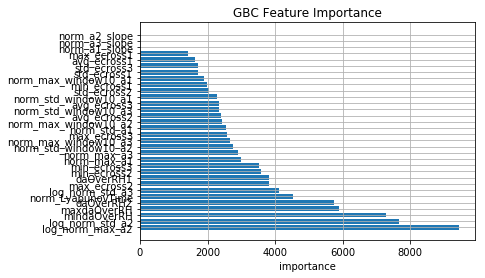

['log_norm_max_a2', 'log_norm_std_a2', 'mindaOverRH', 'maxdaOverRH', 'daOverRH2', 'norm_LyapunovTime', 'log_norm_std_a3', 'max_ecross2', 'daOverRH1', 'min_ecross2', 'min_ecross3', 'norm_max_a1', 'norm_max_a3', 'norm_std_window10_a2', 'norm_max_window10_a3', 'max_ecross3', 'norm_std_a1', 'norm_max_window10_a2', 'avg_ecross2', 'norm_std_window10_a3', 'avg_ecross3', 'norm_std_window10_a1', 'std_ecross2', 'min_ecross1', 'norm_max_window10_a1', 'std_ecross1', 'std_ecross3', 'avg_ecross1', 'max_ecross1', 'norm_a1_slope', 'norm_a3_slope', 'norm_a2_slope']


In [115]:
from pylab import *

points = vals_sorted

pos = arange(len(vals_sorted)) + .5 # centres the graph along y 

figure(1) 
barh(pos, vals_sorted, align='center') 
yticks(pos, feature_names_sorted)
xlabel('importance')
title('GBC Feature Importance')
grid(True)
show()

print(feature_names_sorted)

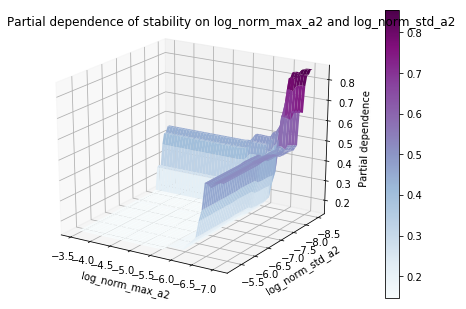

In [117]:
names = feature_names_sorted

D3_pdp((0,1), model, X_train_sorted, feature_names_sorted)

In [118]:
import itertools

comb =  list(itertools.combinations(range(0, 10), 2)) # create the possible top 10 combinations

print comb

[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (5, 6), (5, 7), (5, 8), (5, 9), (6, 7), (6, 8), (6, 9), (7, 8), (7, 9), (8, 9)]


<IPython.core.display.Javascript object>


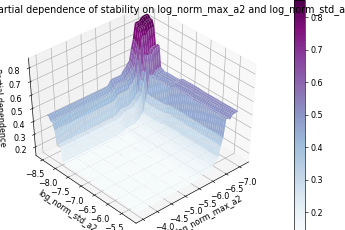

<IPython.core.display.Javascript object>


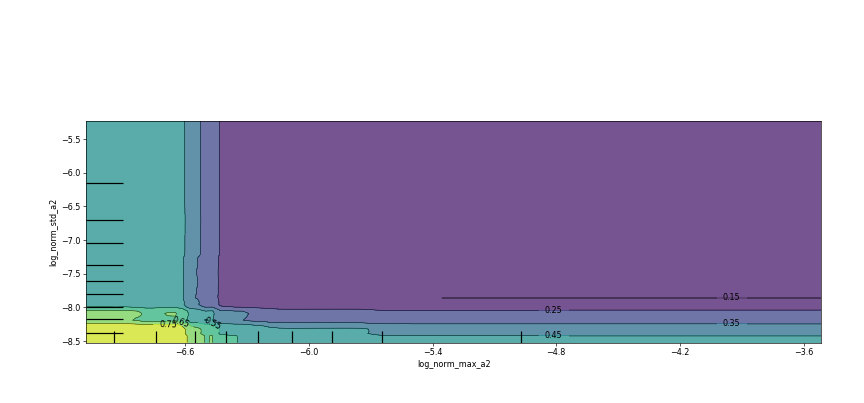

<IPython.core.display.Javascript object>


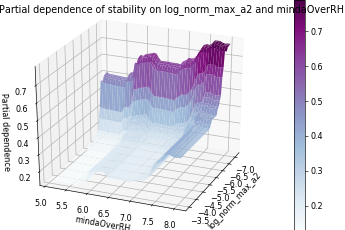

<IPython.core.display.Javascript object>


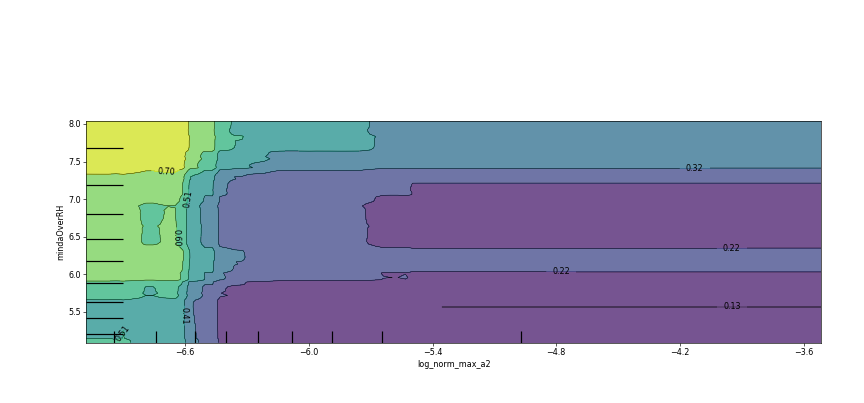

<IPython.core.display.Javascript object>


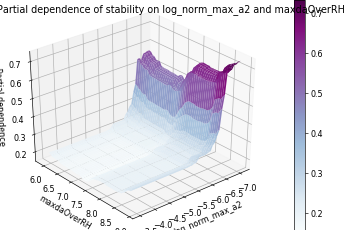

<IPython.core.display.Javascript object>


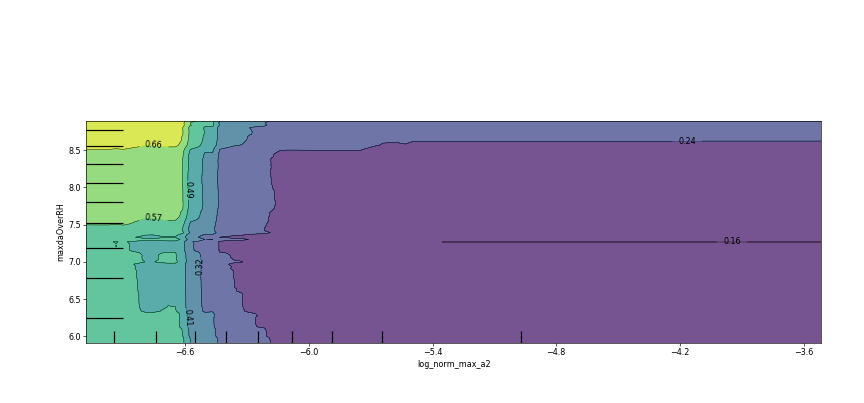

<IPython.core.display.Javascript object>


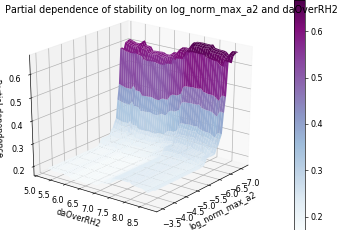

<IPython.core.display.Javascript object>


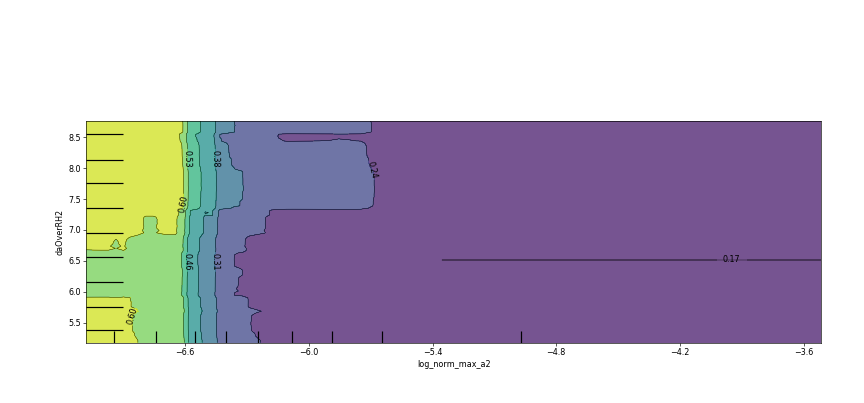

<IPython.core.display.Javascript object>


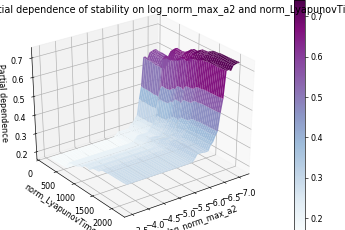

<IPython.core.display.Javascript object>


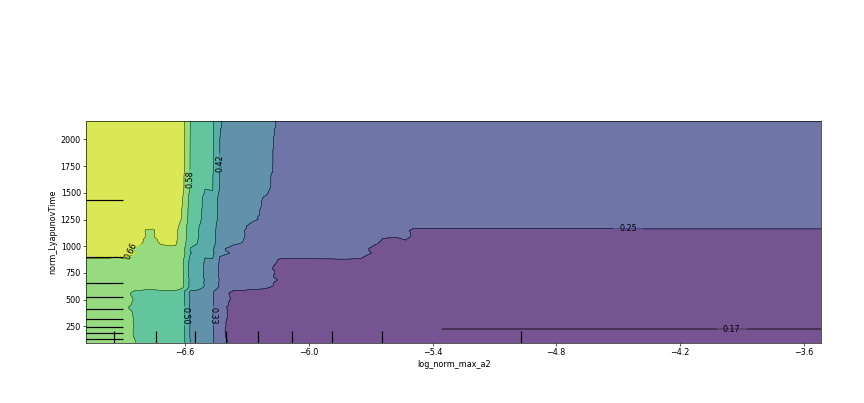

<IPython.core.display.Javascript object>


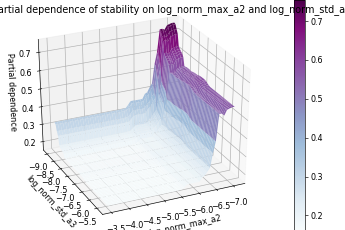

<IPython.core.display.Javascript object>


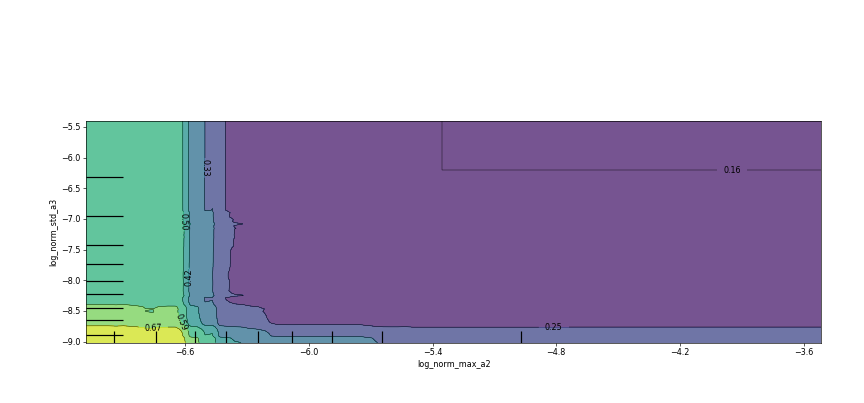

<IPython.core.display.Javascript object>


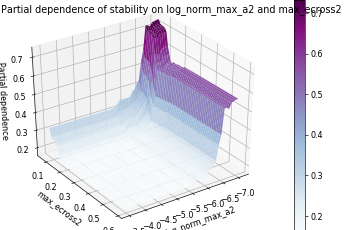

<IPython.core.display.Javascript object>


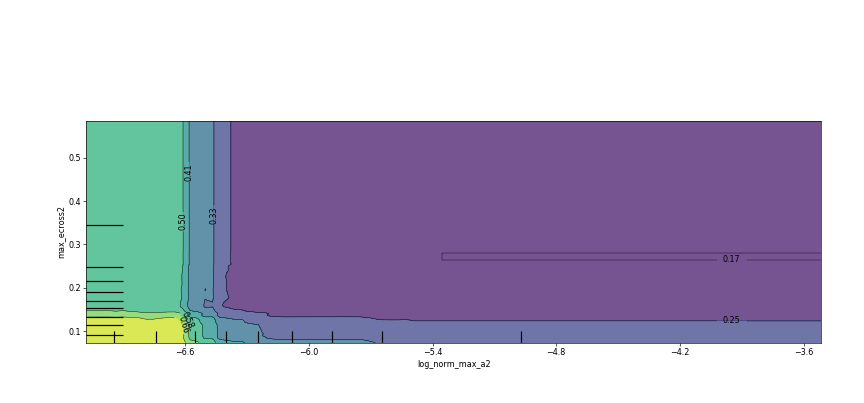

<IPython.core.display.Javascript object>


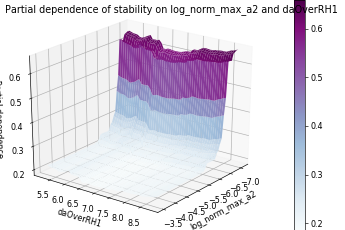

<IPython.core.display.Javascript object>


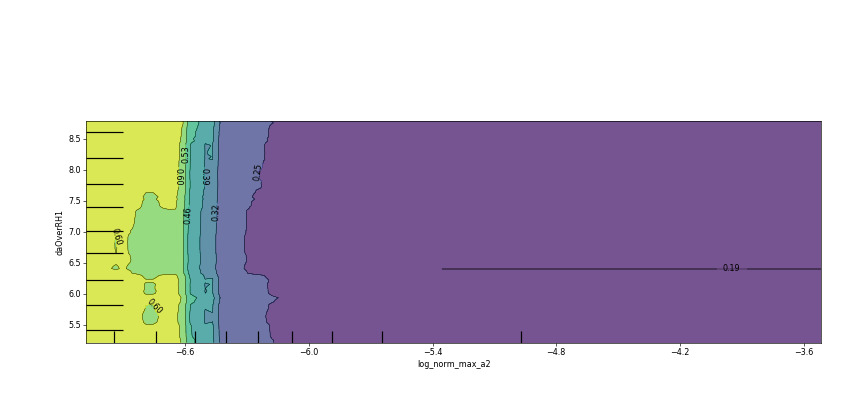

<IPython.core.display.Javascript object>


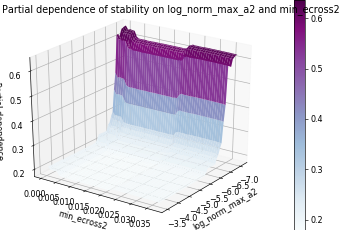

<IPython.core.display.Javascript object>


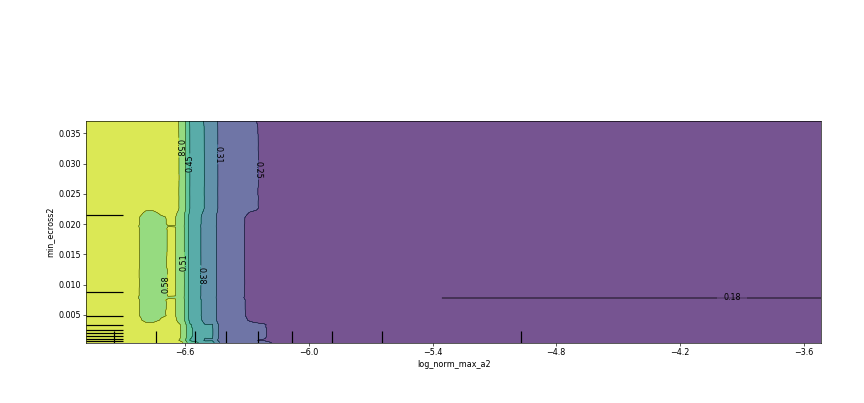

<IPython.core.display.Javascript object>


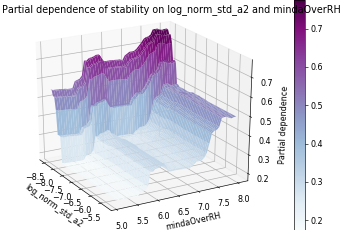

<IPython.core.display.Javascript object>


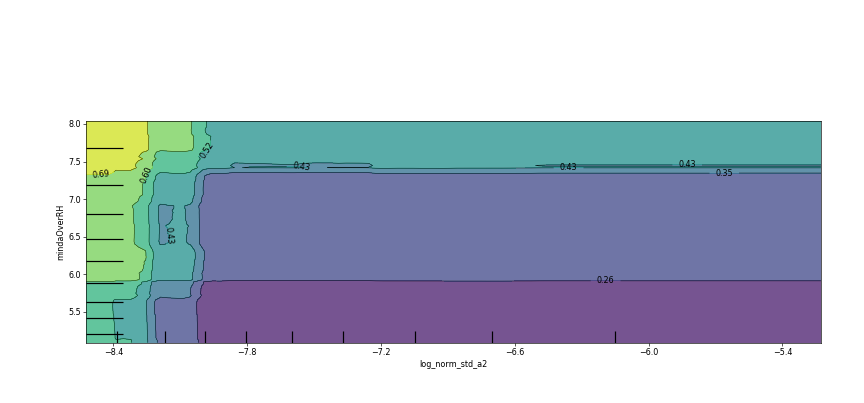

/home/tom/anaconda2/envs/py27/lib/python2.7/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


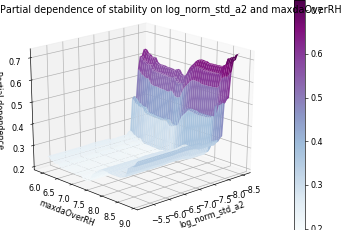

<IPython.core.display.Javascript object>


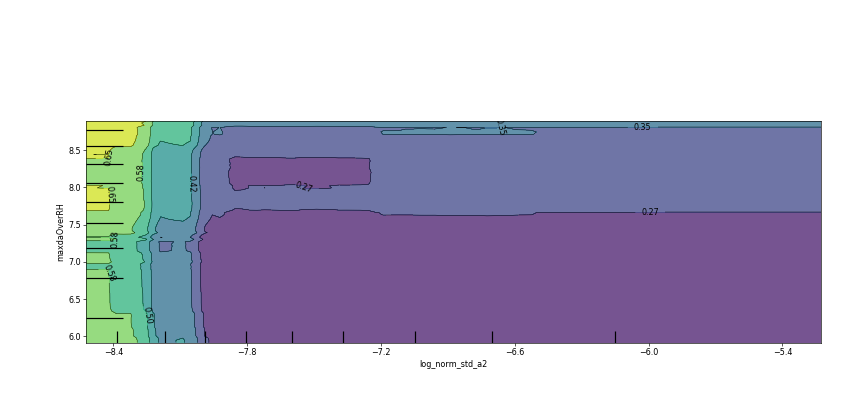

<IPython.core.display.Javascript object>


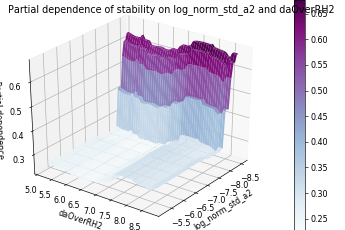

<IPython.core.display.Javascript object>


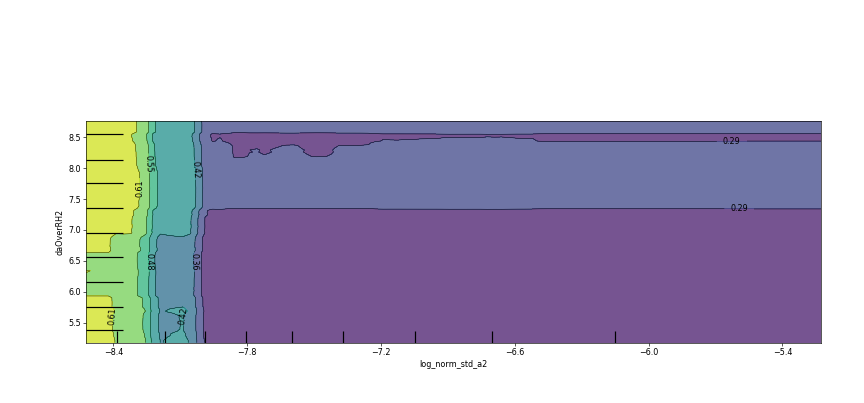

<IPython.core.display.Javascript object>


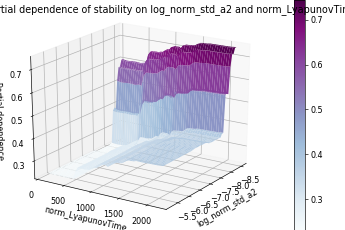

<IPython.core.display.Javascript object>


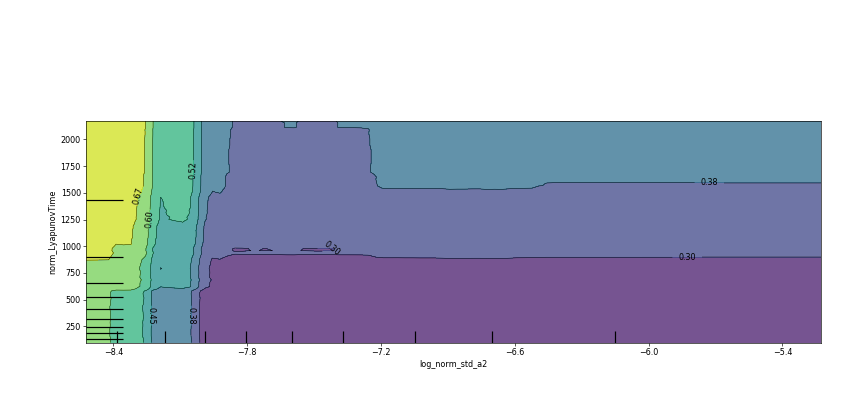

<IPython.core.display.Javascript object>


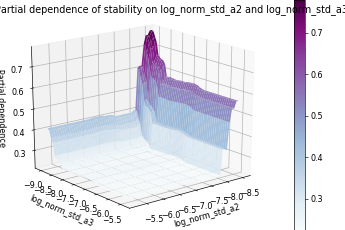

<IPython.core.display.Javascript object>


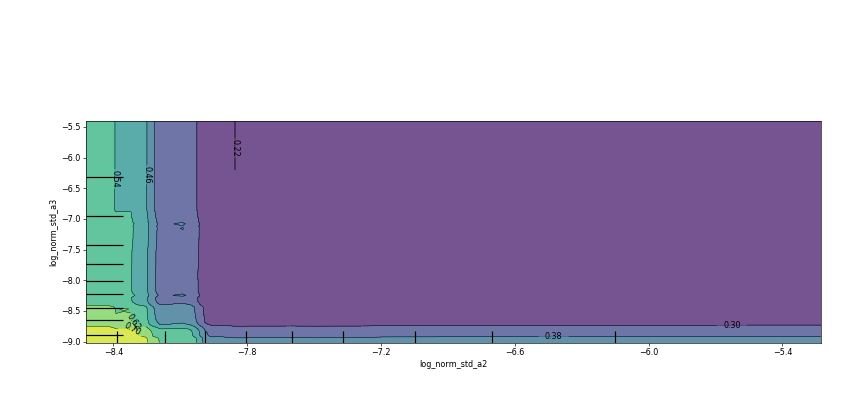

<IPython.core.display.Javascript object>


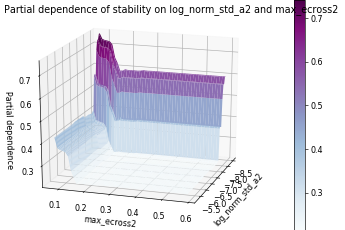

<IPython.core.display.Javascript object>


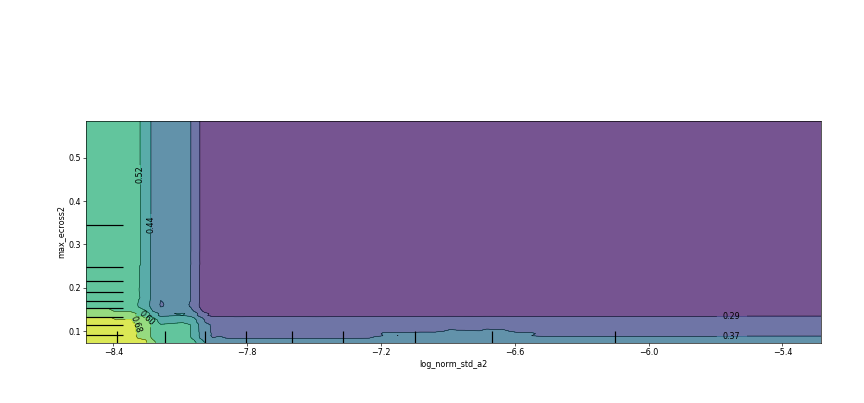

<IPython.core.display.Javascript object>


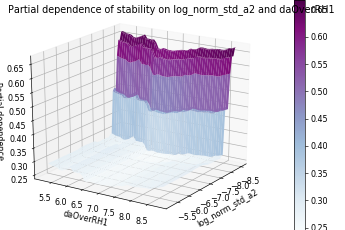

<IPython.core.display.Javascript object>


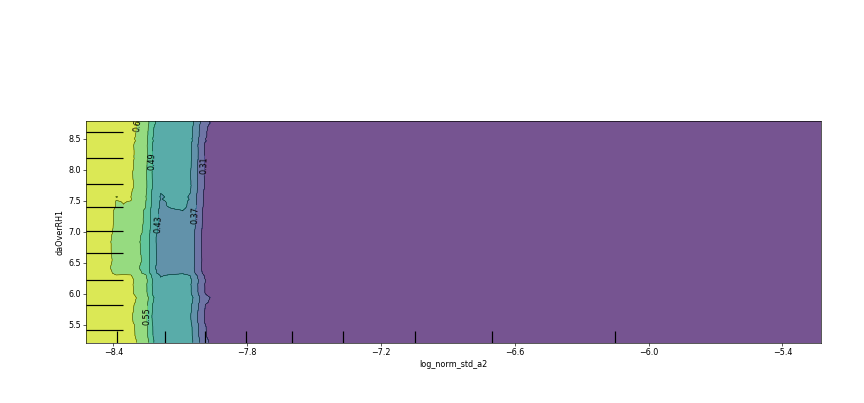

<IPython.core.display.Javascript object>


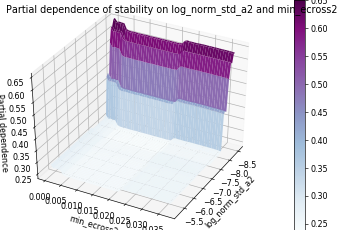

<IPython.core.display.Javascript object>


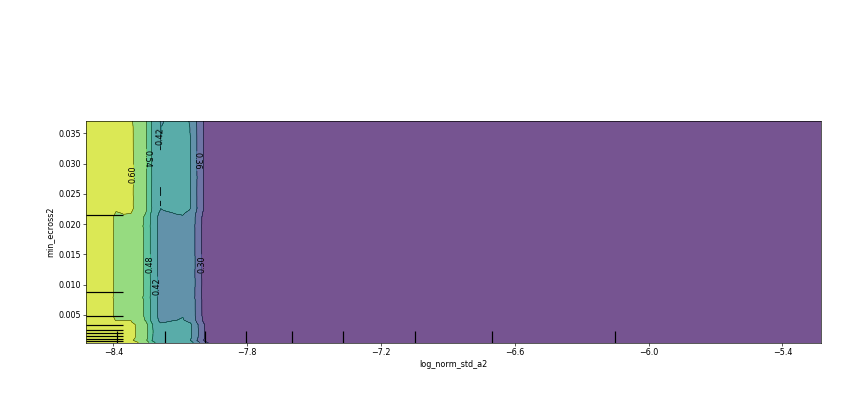

<IPython.core.display.Javascript object>


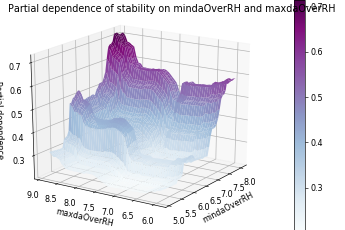

<IPython.core.display.Javascript object>


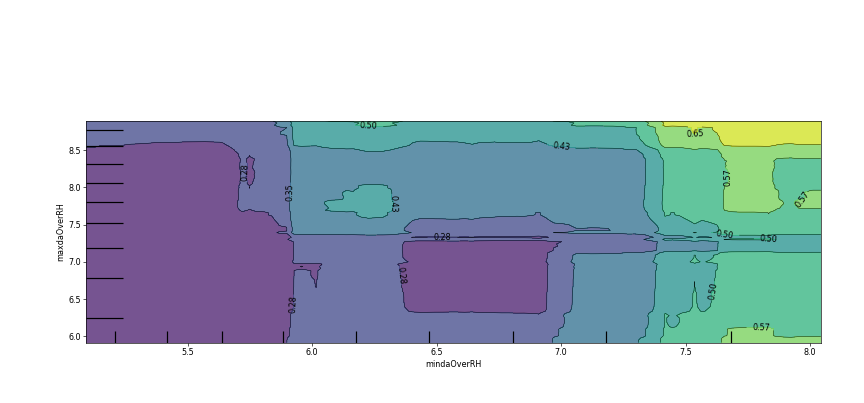

<IPython.core.display.Javascript object>


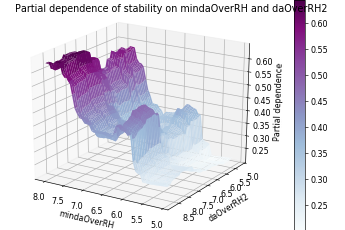

<IPython.core.display.Javascript object>


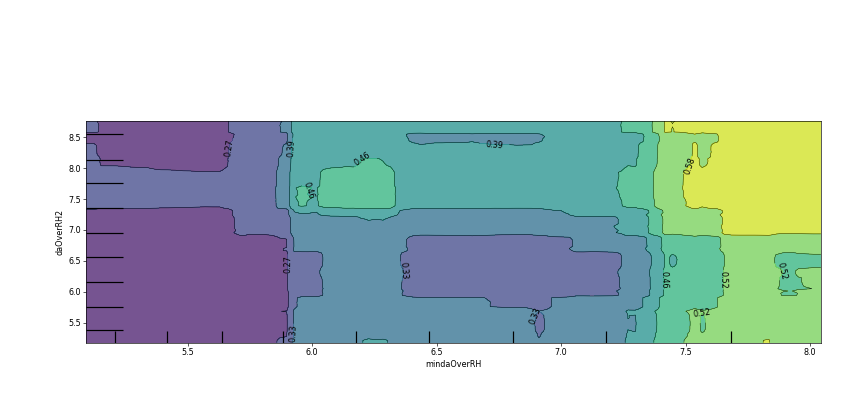

<IPython.core.display.Javascript object>


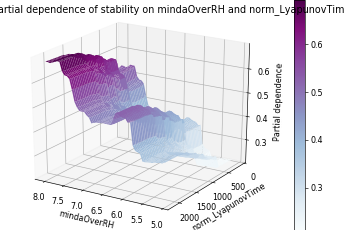

<IPython.core.display.Javascript object>


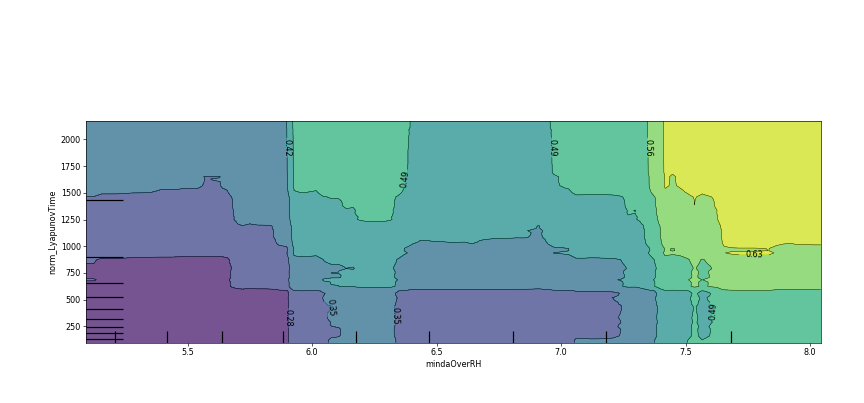

<IPython.core.display.Javascript object>


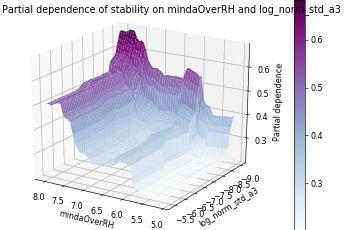

<IPython.core.display.Javascript object>


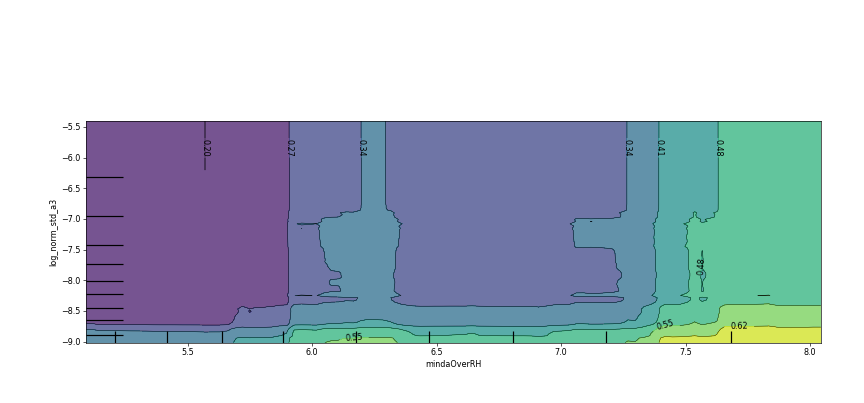

<IPython.core.display.Javascript object>


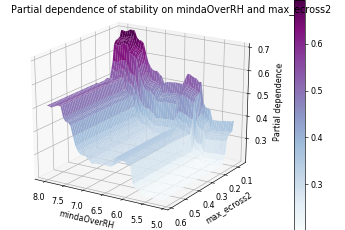

<IPython.core.display.Javascript object>


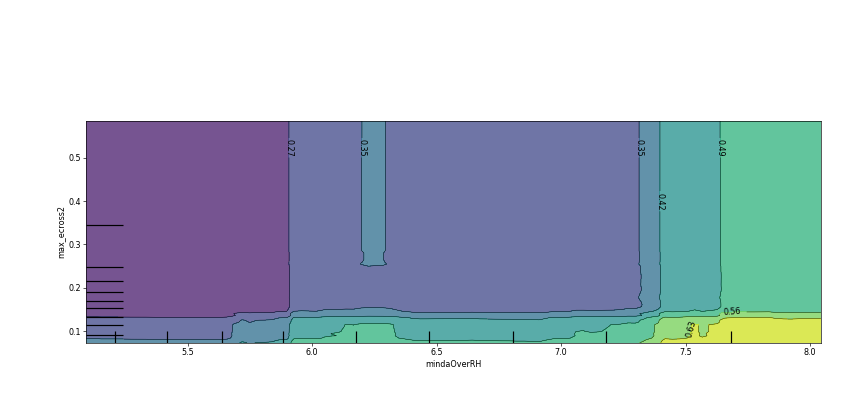

<IPython.core.display.Javascript object>


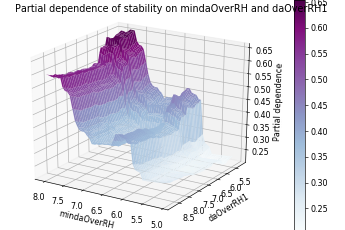

<IPython.core.display.Javascript object>


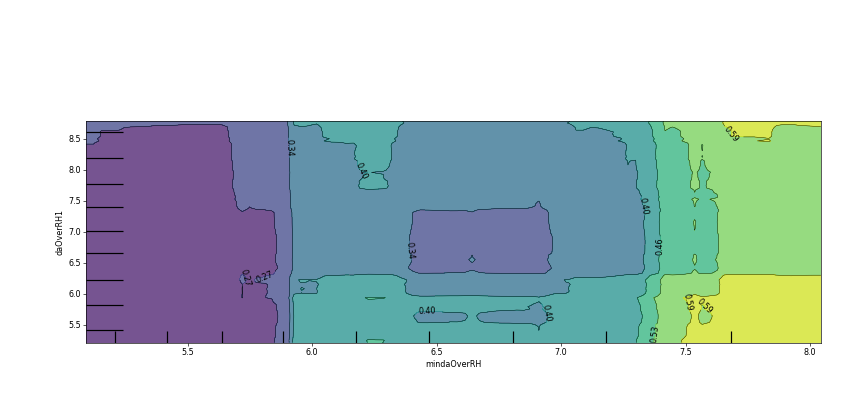

<IPython.core.display.Javascript object>


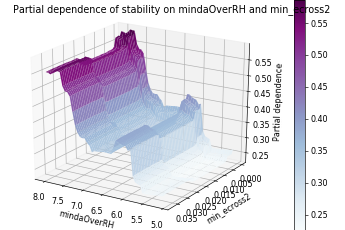

<IPython.core.display.Javascript object>


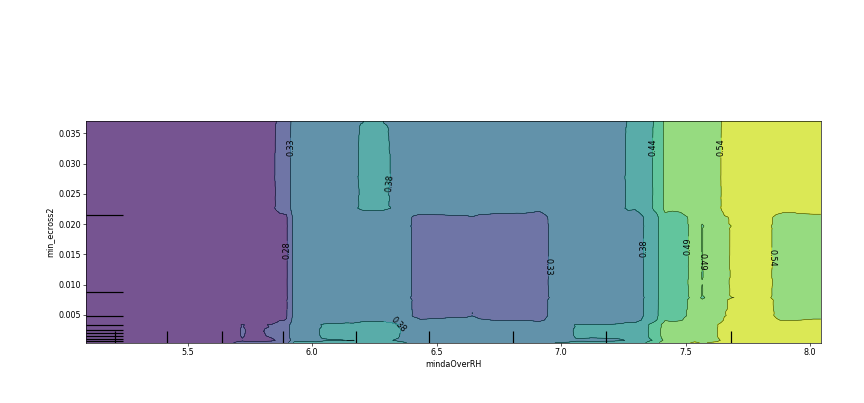

<IPython.core.display.Javascript object>


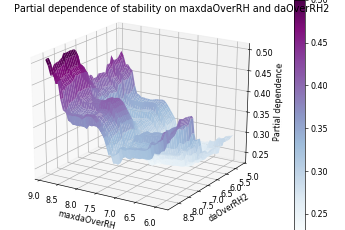

<IPython.core.display.Javascript object>


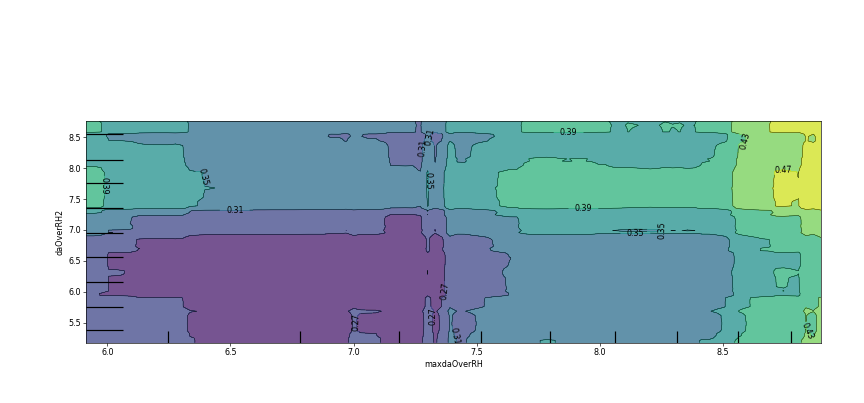

<IPython.core.display.Javascript object>


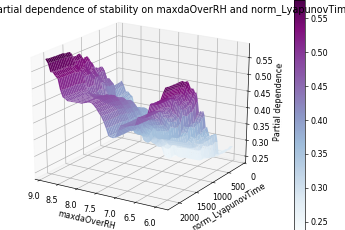

<IPython.core.display.Javascript object>


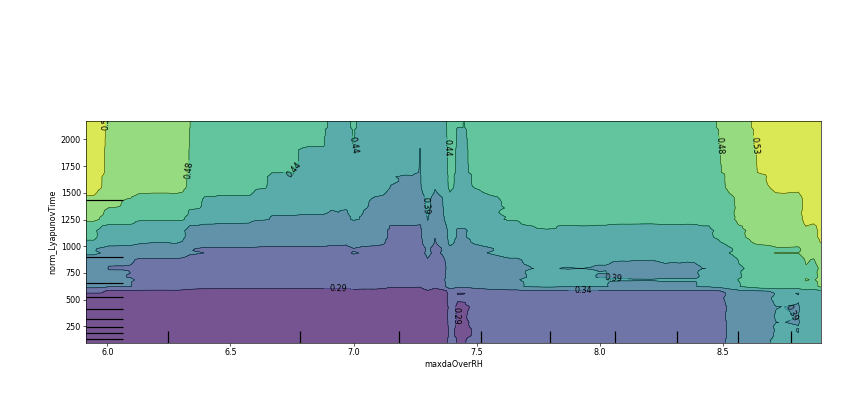

<IPython.core.display.Javascript object>


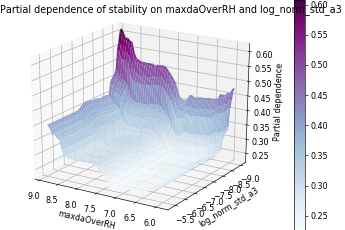

<IPython.core.display.Javascript object>


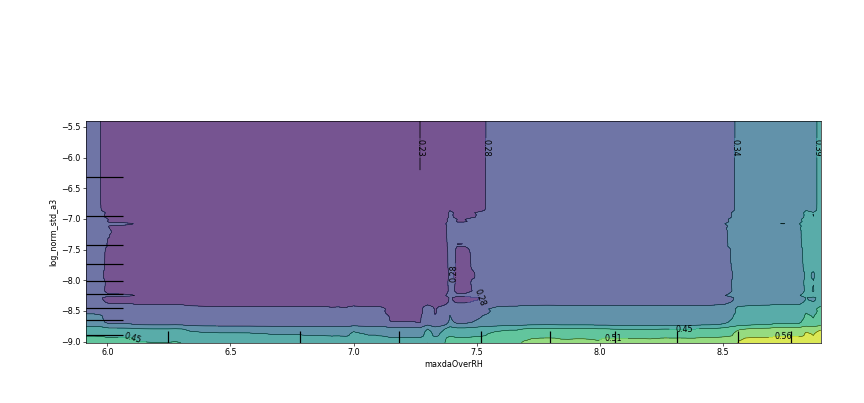

<IPython.core.display.Javascript object>


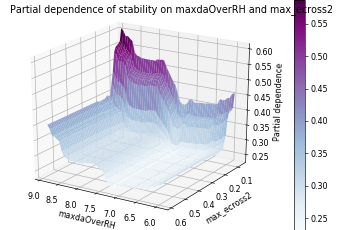

<IPython.core.display.Javascript object>


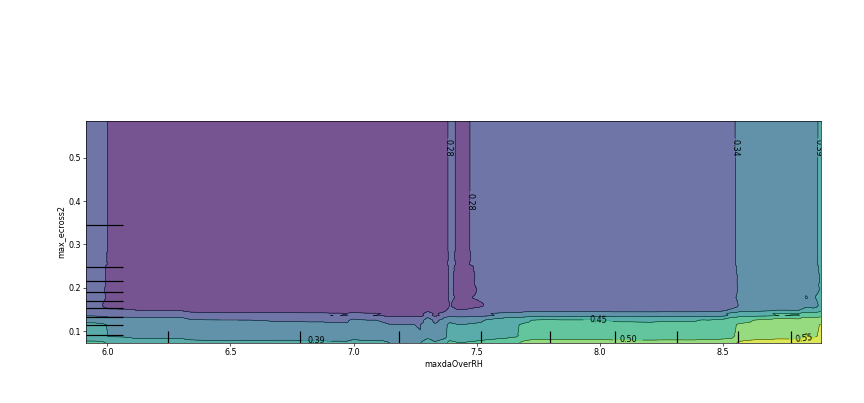

<IPython.core.display.Javascript object>


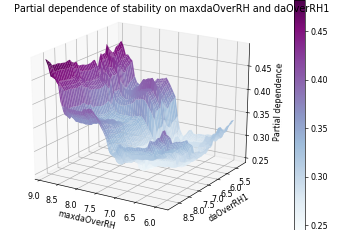

<IPython.core.display.Javascript object>


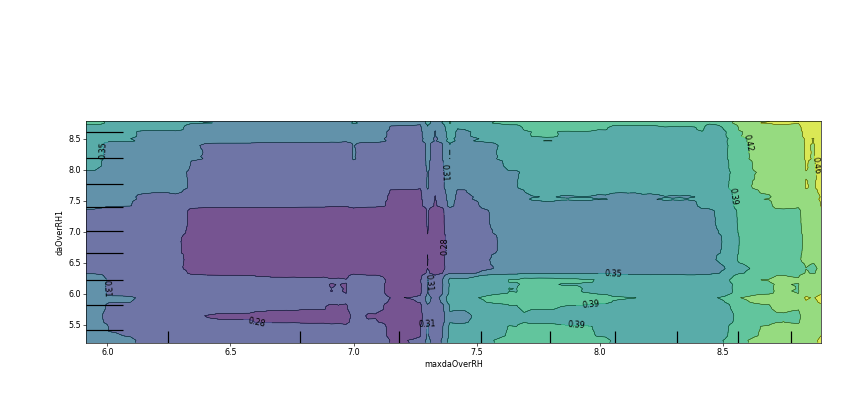

<IPython.core.display.Javascript object>


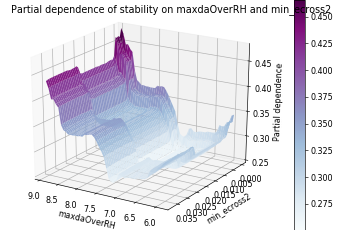

<IPython.core.display.Javascript object>


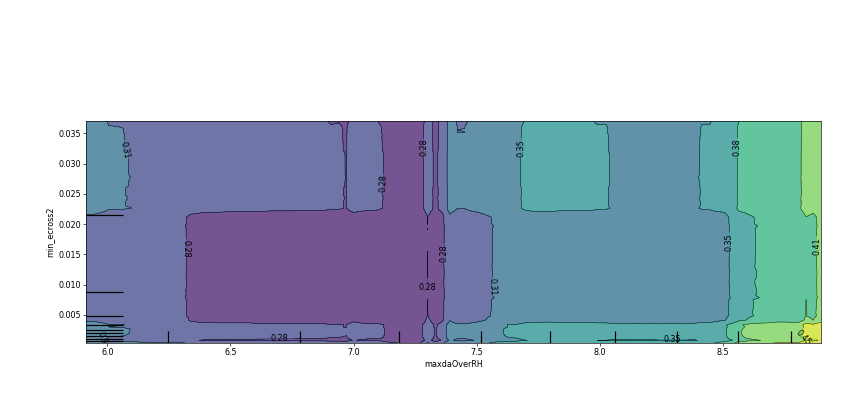

<IPython.core.display.Javascript object>


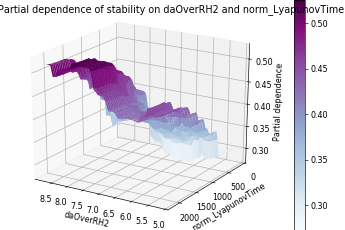

<IPython.core.display.Javascript object>


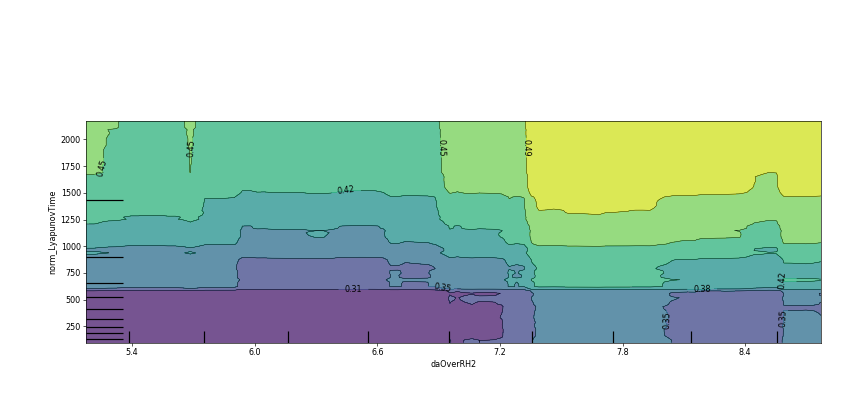

<IPython.core.display.Javascript object>


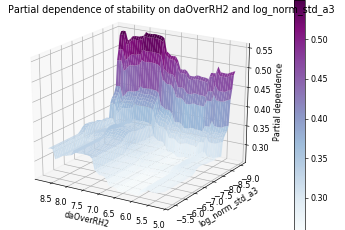

<IPython.core.display.Javascript object>


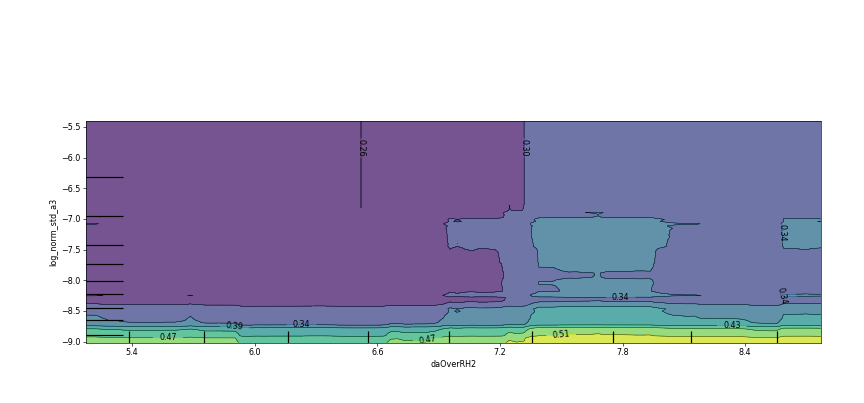

<IPython.core.display.Javascript object>


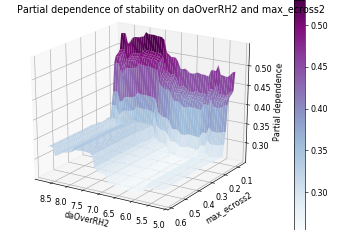

<IPython.core.display.Javascript object>


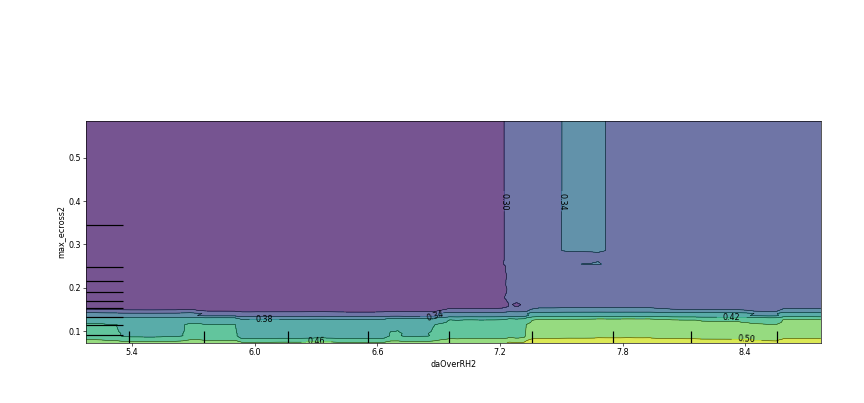

<IPython.core.display.Javascript object>


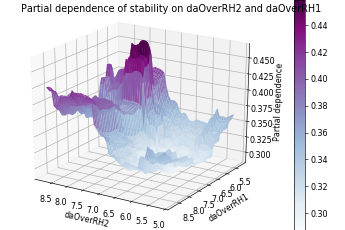

<IPython.core.display.Javascript object>


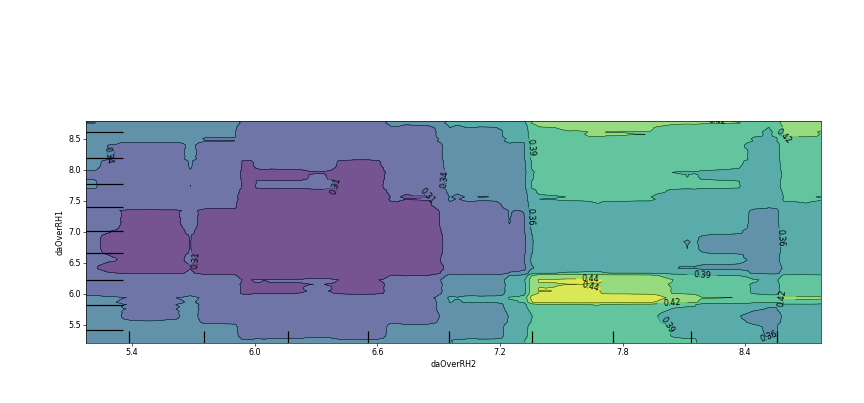

<IPython.core.display.Javascript object>


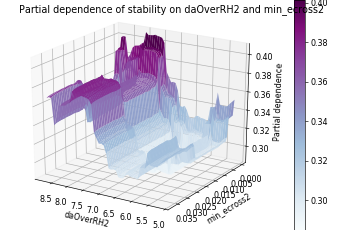

<IPython.core.display.Javascript object>


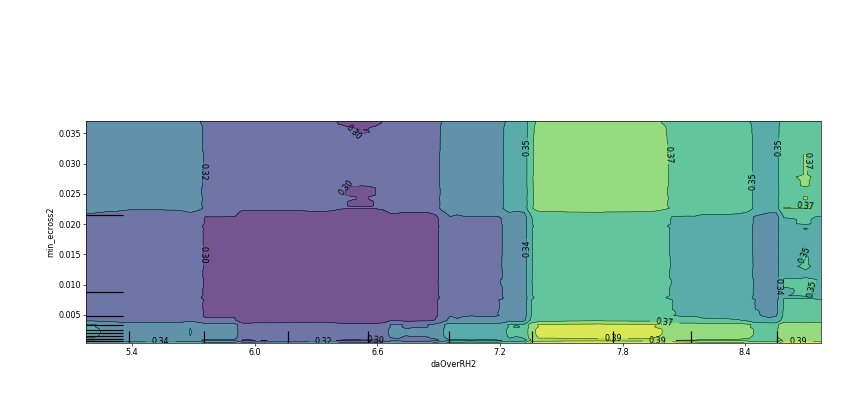

<IPython.core.display.Javascript object>


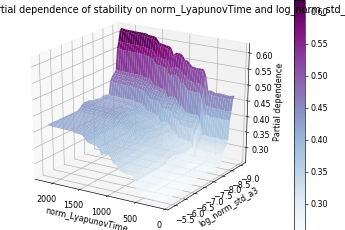

<IPython.core.display.Javascript object>


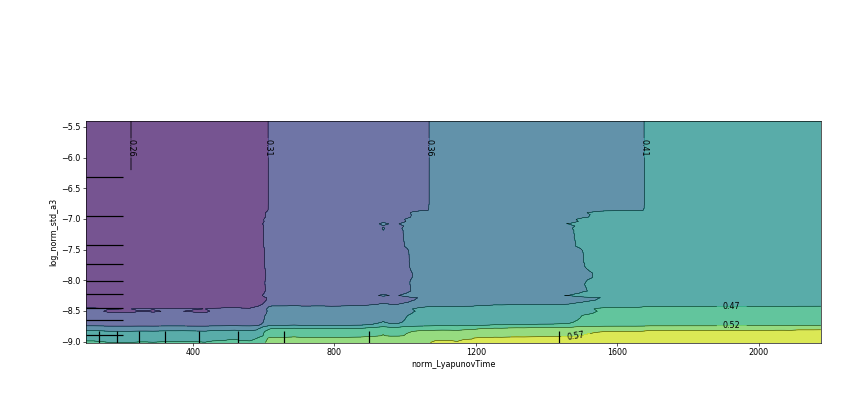

<IPython.core.display.Javascript object>


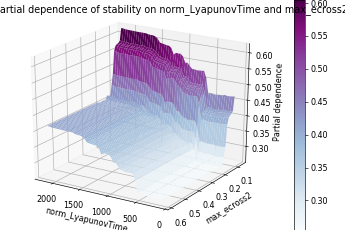

<IPython.core.display.Javascript object>


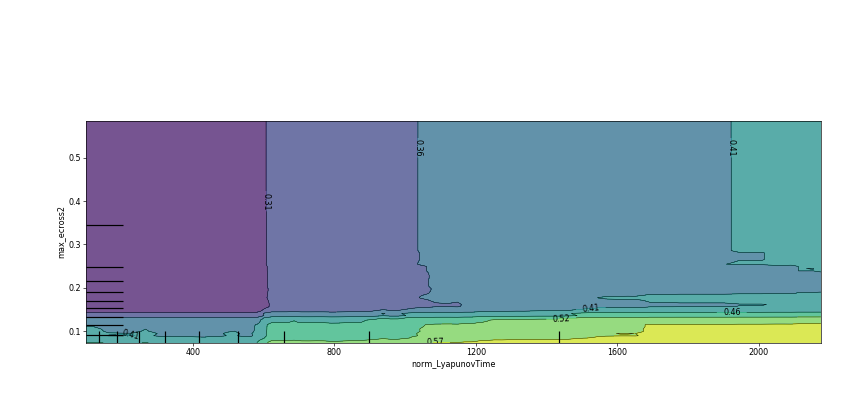

<IPython.core.display.Javascript object>


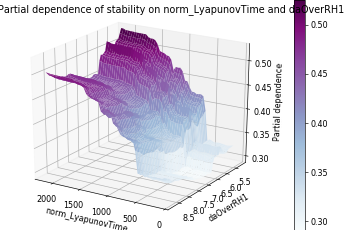

<IPython.core.display.Javascript object>


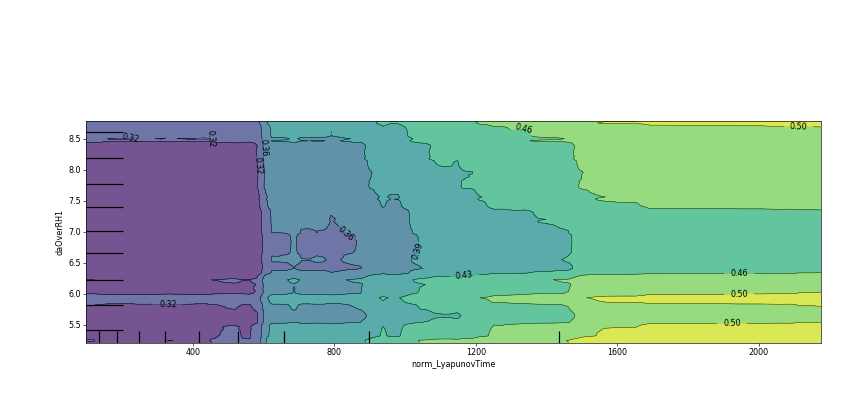

<IPython.core.display.Javascript object>


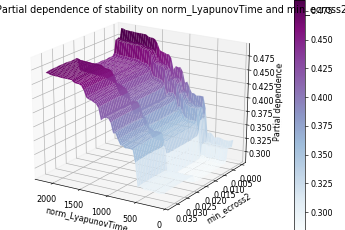

<IPython.core.display.Javascript object>


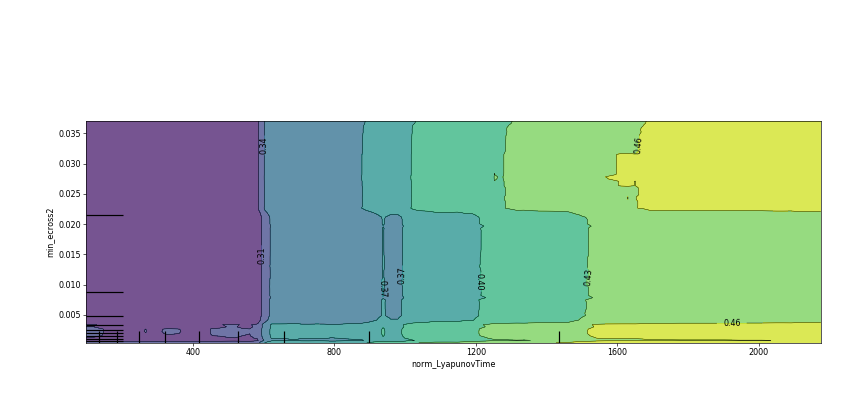

<IPython.core.display.Javascript object>


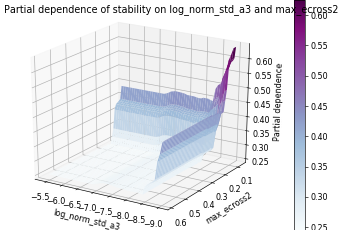

<IPython.core.display.Javascript object>


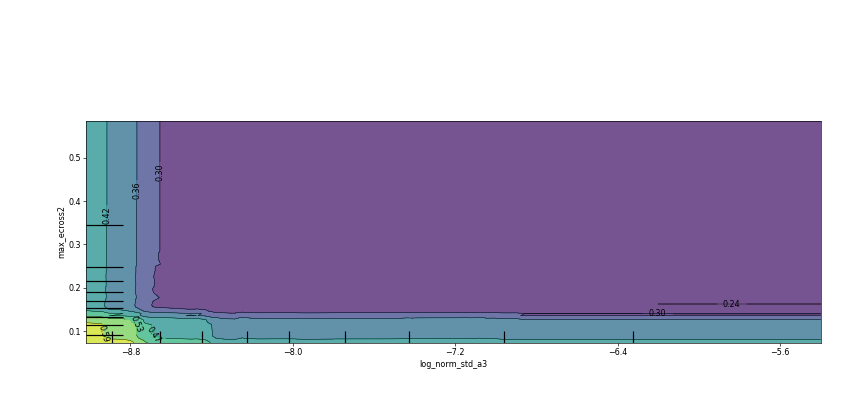

<IPython.core.display.Javascript object>


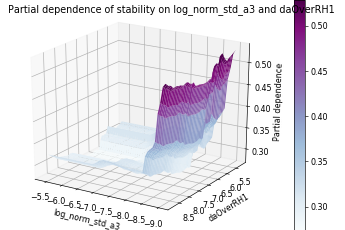

<IPython.core.display.Javascript object>


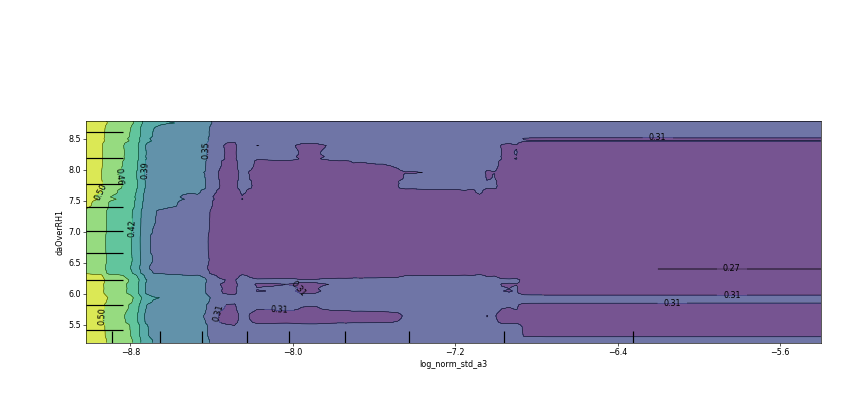

<IPython.core.display.Javascript object>


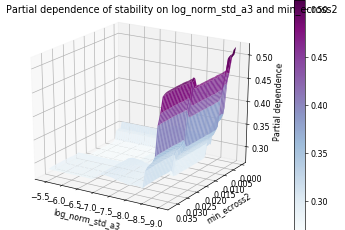

<IPython.core.display.Javascript object>


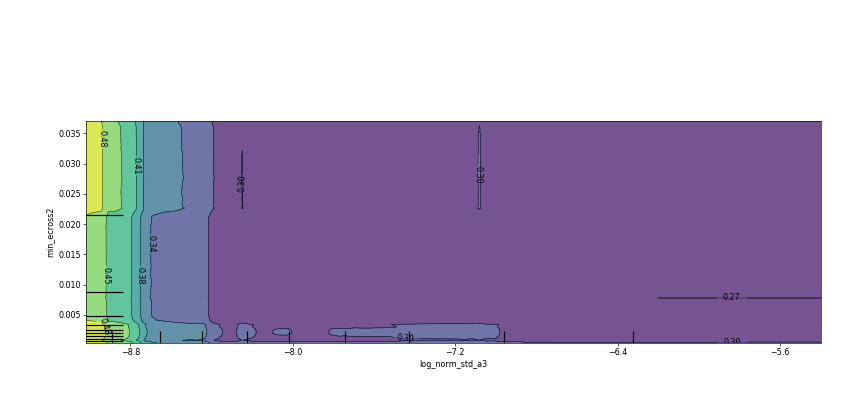

<IPython.core.display.Javascript object>


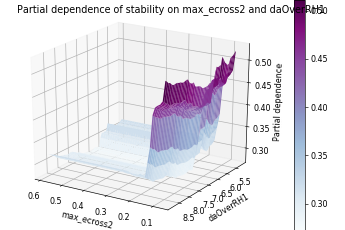

<IPython.core.display.Javascript object>


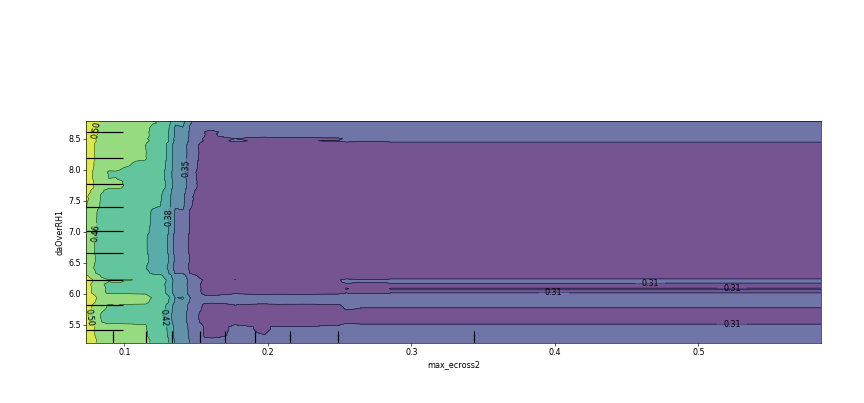

<IPython.core.display.Javascript object>


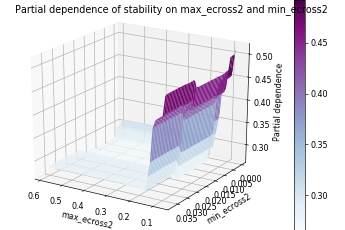

<IPython.core.display.Javascript object>


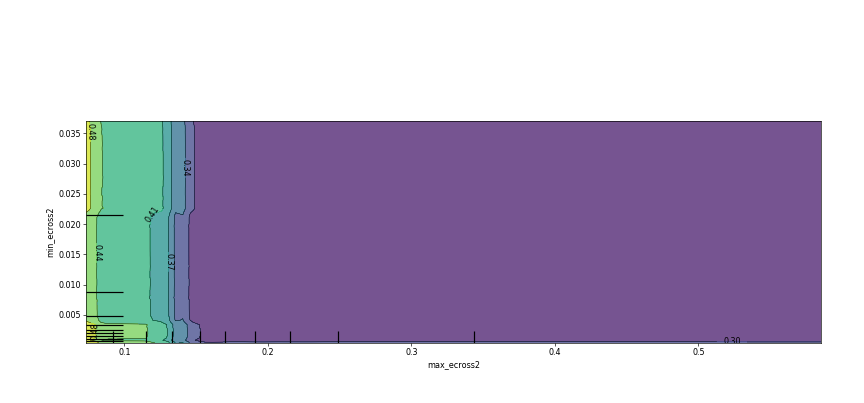

<IPython.core.display.Javascript object>


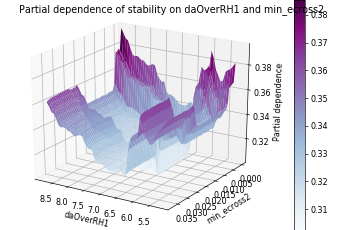

<IPython.core.display.Javascript object>


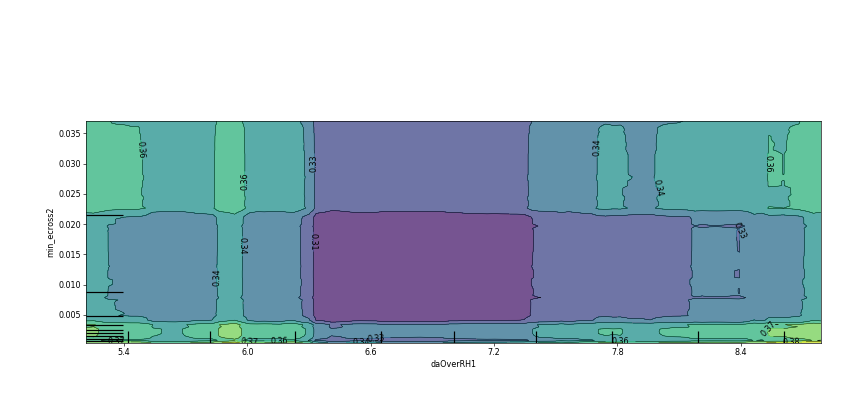

In [121]:
%matplotlib nbagg    
%matplotlib notebook

from sklearn.ensemble.partial_dependence import plot_partial_dependence # the proba argument has been added to the PDP function


for pairs in comb:
    names = feature_names_sorted
    D3_pdp(pairs, model, X_train_sorted, names)
    fig, axs = plot_partial_dependence(model, X_train_sorted, [pairs],
                                       feature_names=feature_names_sorted,
                                       grid_resolution=100, figsize=(15,7), proba=True)
    
    
   
    plt.show()